# Task 1 : Prediction using Supervised ML

## **Problem statement**


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## To predict:

What will be predicted score if a student studies for 9.25 hrs/ day?

### Author: Richie Mathew

In [4]:
#importing relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error

In [6]:
#loading dataset into dataframe
df = pd.read_csv("data.txt")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,75


In [7]:
# count of dataset
df.count()

Hours     25
Scores    25
dtype: int64

In [8]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,53.280000
std,2.525094,25.295784
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,54.000000
75%,7.400000,75.000000
max,9.200000,95.000000


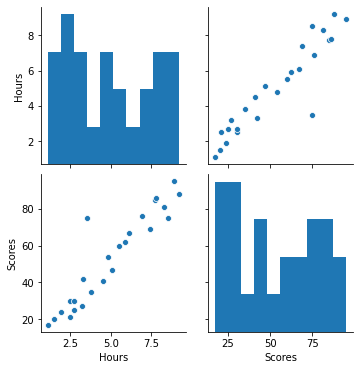

In [10]:
#feature wise plot of dataframe
sns.pairplot(df)

[]

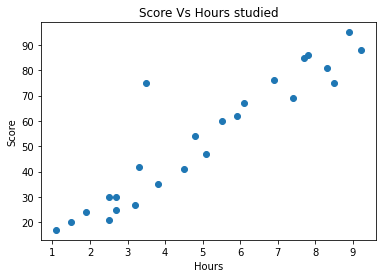

In [11]:
# ploting feature vs target
plt.scatter(df.Hours,df.Scores)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Score Vs Hours studied")
plt.plot()

In [12]:
#Pearsons correlation
corr, _ = pearsonr(df.Hours,df.Scores)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.931


In [13]:

#preprocessing and fiting the linear model
X = df.Hours
y = df.Scores
X = sm.add_constant(X) #adding constant as student with zero hours of study will probably score some marks
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2,random_state = 1234)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.params

const    6.977366
Hours    9.487091
dtype: float64

In [14]:
#printing summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.88e-09
Time:                        03:53:41   Log-Likelihood:                -73.028
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9774      4.842      1.441      0.167      -3.194      17.149
Hours          9.4871      0.859     11.050      0.000       7.683      11.291
==============================================================================
Omnibus:                       29.756   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.471
Skew:                           2.417   Prob(JB):                     1.22e-13
Kurtosis:                       9.927   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Model evaluation
y_pred = results.predict(X_test)
Y_pred_training = results.predict(X_train)
square_err_T = mean_absolute_error(y_train,Y_pred_training )
square_err_V = mean_absolute_error(y_test,y_pred )
print(f"Training MAE: {square_err_T}")
print(f"Validation MAE: {square_err_V}")

Training MAE: 5.931359551204995
Validation MAE: 6.570791688133272


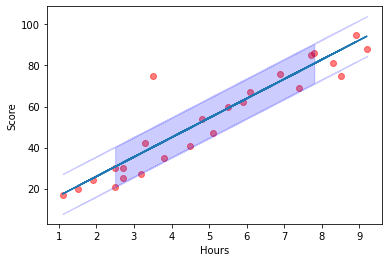

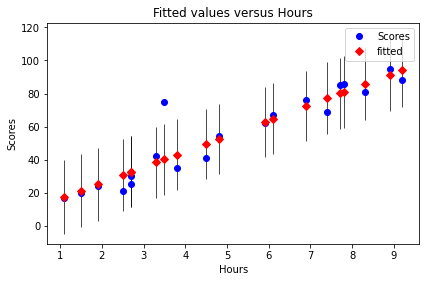

In [16]:
# plotting linear model with confidence interval
linear_line = results.params[0] + results.params[1] * df.Hours
CI = 1.96 * np.std(df.Scores)/np.sqrt(df.count()[1])
plt.scatter(df.Hours,df.Scores , color = "red" , alpha = 0.5)
plt.plot(df.Hours,linear_line)
plt.fill_between(df.Hours,(linear_line-CI),(linear_line + CI), color = "b" , alpha = 0.2)
plt.xlabel("Hours")
plt.ylabel("Score")
fig = sm.graphics.plot_fit(results, "Hours")
fig.tight_layout(pad=1.0)

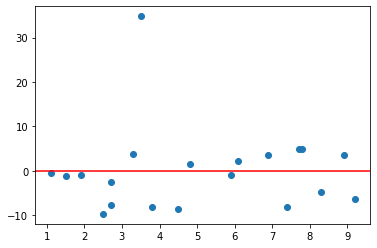

In [17]:
#residuals analysis
plt.scatter(X_train.Hours,results.resid)
plt.axhline(y=0, color='r', linestyle='-')


In [18]:
# Predicting Score for 9.25 hours of study.
y = results.params[0] + results.params[1]*9.25
print(f"predicted score for the student studying for 9.25 hours is {y}")

predicted score for the student studying for 9.25 hours is 94.73296124563514
